### Load Data

In [1]:
import pandas as pd
train_df = pd.read_csv('./data/train.txt',sep=";",names=["text","emotion"])
test_df = pd.read_csv('./data/test.txt',sep=";",names=["text","emotion"])

In [2]:
train_df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
test_df.head()

,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


### Dataset preprocessing

In [4]:
print(f'Training data: {len(train_df)}\nTesting data: {len(test_df)}')

Training data: 16000
Testing data: 2000


##### Testing data insufficient, both datesets will be combined so that there are sufficient training data

In [5]:
full_df = pd.concat([train_df,test_df],axis=0,ignore_index=True)

In [6]:
full_df

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
17995,i just keep feeling like someone is being unki...,anger
17996,im feeling a little cranky negative after this...,anger
17997,i feel that i am useful to my people and that ...,joy
17998,im feeling more comfortable with derby i feel ...,joy


In [7]:
# check if data is balanced or not
full_df.emotion.value_counts()

emotion
joy         6057
sadness     5247
anger       2434
fear        2161
love        1463
surprise     638
Name: count, dtype: int64

In [8]:
# check for any null data
full_df.isnull().sum()

text       0
emotion    0
dtype: int64

In [9]:
# check for any duplicated data
full_df.duplicated().sum()

1

In [10]:
# remove duplicated rows
index = full_df[full_df.duplicated() == True].index
full_df.drop(index,axis = 0,inplace=True)
full_df.reset_index(inplace=True,drop=True)

### Text processing


In [20]:
# identify any abnormal strings in the text columns
import re
abnormal = full_df[full_df['text'].str.contains('http')]
abnormal

,text,emotion
125,i feel they are pretty safe on my blog img src...,joy
323,i stopped feeling so exhausted a href http pro...,sadness
462,i feel so dazed a href http twitter,surprise
866,i feel unwelcome at work sometimes and think p...,sadness
967,i a href http feeling groggy,sadness
...,...,...
17601,im feeling cranky a href http doingaone eighty,anger
17645,i feel special a href http facsimilogos,joy
17657,i feel numb the end of the world as we know it...,sadness
17854,i really need to find my nitch up here in vt i...,sadness


In [21]:
# strings to removed: blog,src,img,href,http,https,twitter
# create function to remove unnecessary strings
def text_process_1(text):
    pattern = r"blog|src|img|href|http|https|twitter"
    result = re.sub(pattern,"",text)
    return result

In [22]:
# Lemmatization function
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
def text_process_2(text):
    tokens = word_tokenize(text) # generate tokens
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words] # filter out stopwords
    lemmatized_tokens = [lemmatizer.lemmatize(cleaned_tokens) for cleaned_tokens in filtered_tokens] # lemmatize tokens
    result = " ".join(lemmatized_tokens)
    return result

In [23]:
# implement text_process_1 function on text column
full_df['text'] = full_df['text'].apply(text_process_1)

In [24]:
# implement text_process_2 function on text column
full_df['text'] = full_df['text'].apply(text_process_2)

In [25]:
# final processed datafram
full_df

,text,emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger
...,...,...
17994,keep feeling like someone unkind wrong think g...,anger
17995,im feeling little cranky negative doctor appoi...,anger
17996,feel useful people give great feeling achievement,joy
17997,im feeling comfortable derby feel though start...,joy


### Build ML models

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X = full_df['text']
Y = full_df['emotion']
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.30,random_state=2)
vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors = vectorizer.transform(test_x)

In [37]:
# Build logistic regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(train_x_vectors,train_y)

C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
# Build SVM model
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(train_x_vectors,train_y)

SVC()

In [39]:
# Build naive bayes model
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(train_x_vectors,train_y)

MultinomialNB()

In [41]:
# generate predictions
lr_pred = lr_model.predict(test_x_vectors)
svm_pred = svm_model.predict(test_x_vectors)
nb_pred = nb_model.predict(test_x_vectors)

In [43]:
# generate accuracy scores
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(test_y,lr_pred)
svm_acc = accuracy_score(test_y,svm_pred)
nb_acc = accuracy_score(test_y,nb_pred)
print(f"Accuracy scores:\nLogistic Regression: {round(lr_acc,3)}\nSVM: {round(svm_acc,3)}\nNB: {round(nb_acc,3)}")

Accuracy scores:
Logistic Regression: 0.867
SVM: 0.855
NB: 0.677


In [70]:
# generate precision scores for each label
from sklearn.metrics import precision_score
labels = full_df.emotion.unique()
lr_pre = precision_score(test_y,lr_pred,average=None,labels=labels)
svm_pre = precision_score(test_y,svm_pred,average=None,labels=labels)
nb_pre = precision_score(test_y,nb_pred,average=None,labels=labels)
print("Precision scores for each labels (LR, SVM, NB)")
for i in range(len(labels)):
    print(f'{labels[i]}: {round(lr_pre[i],3)}, {round(svm_pre[i],3)}, {round(nb_pre[i],3)}')

Precision scores for each labels (LR, SVM, NB)
sadness: 0.883, 0.891, 0.676
anger: 0.907, 0.891, 0.943
love: 0.886, 0.895, 1.0
surprise: 0.845, 0.814, 1.0
fear: 0.85, 0.844, 0.867
joy: 0.845, 0.817, 0.64


### Hyperparamter tuning

In [71]:
from sklearn.model_selection import GridSearchCV
# Tuned logistic regression
params = {'penalty':('l1','l2',None),'dual':(True,False),'C':(1,2,4,8),'fit_intercept':(True,False),'solver':('lbfgs','liblinear','saga','sag')}
lr = LogisticRegression()
lr_tuned = GridSearchCV(lr,params,cv=3)
lr_tuned.fit(train_x_vectors,train_y)

C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': (1, 2, 4, 8), 'dual': (True, False),
                         'fit_intercept': (True, False),
                         'penalty': ('l1', 'l2', None),
                         'solver': ('lbfgs', 'liblinear', 'saga', 'sag')})

In [74]:
print(round(lr_tuned.score(test_x_vectors,test_y),3))
print(lr_tuned.best_params_)

0.902
{'C': 4, 'dual': False, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}


In [78]:
from sklearn.model_selection import RandomizedSearchCV
params = {'C':(1,2,4,8),'gamma':('scale','auto'),'degree':(1,2,4,8),'kernel':('linear','poly','rbf','sigmoid')}
svm = SVC()
svm_tuned = RandomizedSearchCV(svm, params,cv=3)
svm_tuned.fit(train_x_vectors,train_y)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': (1, 2, 4, 8),
                                        'degree': (1, 2, 4, 8),
                                        'gamma': ('scale', 'auto'),
                                        'kernel': ('linear', 'poly', 'rbf',
                                                   'sigmoid')})

In [83]:
print(round(svm_tuned.score(test_x_vectors,test_y),3))
print(svm_tuned.best_params_)

0.884
{'kernel': 'linear', 'gamma': 'auto', 'degree': 1, 'C': 1}


In [76]:
params = {'alpha':(1,2,4,8,16),'force_alpha':(True,False),'fit_prior':(True,False)}
nb = MultinomialNB()
nb_tuned = GridSearchCV(nb,params,cv=3)
nb_tuned.fit(train_x_vectors,train_y)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': (1, 2, 4, 8, 16), 'fit_prior': (True, False),
                         'force_alpha': (True, False)})

In [82]:
print(round(nb_tuned.score(test_x_vectors,test_y),3))
print(nb_tuned.best_params_)

0.801
{'alpha': 1, 'fit_prior': False, 'force_alpha': True}


### Build tuned model

In [85]:
new_lr = LogisticRegression(C= 4, dual= False, fit_intercept= True, penalty = 'l1', solver= 'liblinear')
new_lr.fit(train_x_vectors,train_y)

C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=4, penalty='l1', solver='liblinear')

### Model Evaluation

In [95]:
labels = full_df.emotion.unique()
tuned_lr_pred = new_lr.predict(test_x_vectors)
accuracy = accuracy_score(test_y,tuned_lr_pred)
pre = precision_score(test_y,tuned_lr_pred,average=None,labels=labels)
print(f'Accuracy: {round(accuracy,3)}\nPrecision scores:')
for i in range(len(labels)):
    print(f'{labels[i]}: {round(pre[i],3)}')


Accuracy: 0.902
Precision scores:
sadness: 0.934
anger: 0.896
love: 0.814
surprise: 0.778
fear: 0.862
joy: 0.922


<Axes: >

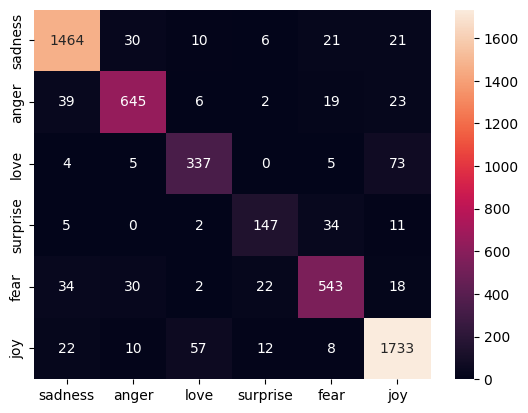

In [104]:
# generate heatmap for confusion_matrix visualisation
import seaborn as sns
from sklearn.metrics import confusion_matrix
labels = full_df.emotion.unique()
cm = confusion_matrix(test_y,tuned_lr_pred,labels=labels)
cm_df = pd.DataFrame(cm,index=labels,columns=labels)
sns.heatmap(data=cm_df,annot=True,fmt="d")